# Loan Application Status Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset.


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [3]:
LDF = pd.read_csv('Loan_prediction.csv')

In [4]:
LDF.shape

(614, 13)

In [5]:
LDF

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('Survived') data type indicates that dependent variable data is categorical in nature.

In [6]:
LDF.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are NaN values in columns: Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History



# Getting the basic summary and statistical information of the data.


In [7]:
LDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
LDF.dtypes[LDF.dtypes == 'object'] #Identifying the Categorical Columns


Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [9]:
LDF.dtypes[LDF.dtypes != 'object']#Identifying the Continuous/discrete Columns


ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [10]:
LDF.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


A higher Std than mean in ApplicantIncome and CoapplicantIncome columns indicates skewness.

There is a huge difference between 75% and max in ApplicantIncome,CoapplicantIncome and LoanAmount, indicating presence of outliers.

In [11]:
LDF.nunique() #Checking for unique elements in each of the columns


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Gender,Married,Education,Self_Employed,Credit_History,Loan_Status each have 2 unique elements,Dependents has 4 unique elements,Property Area has 3 unique elements.

# Dataframe Description:


Independent Variables:
    
1. Loan_ID

2. Gender

3. Married

4. Dependents

5. Education

6. Self_Employed

7. ApplicantIncome

8. CoapplicantIncome

9. Loan_Amount

10. Loan_Amount_Term

11. Credit History

12. Property_Area

Dependent Variable (Target Variable):

Loan_Status

# This is a Classification Problem since the Target variable / Label column ("Loan_Status") has Catergorical type of Data.

# Filling null values using imputation techniques.


In [12]:
(LDF.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checking the type of data in each column above



In [13]:
LDF.Gender.unique()


array(['Male', 'Female', nan], dtype=object)

In [14]:
LDF.Married.unique()


array(['No', 'Yes', nan], dtype=object)

In [15]:
LDF.Dependents.unique()


array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
LDF.Self_Employed.unique()


array(['No', 'Yes', nan], dtype=object)

In [17]:
LDF.Credit_History.unique()       


array([ 1.,  0., nan])

In [18]:
LDF.Loan_Amount_Term.value_counts() 


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
LDF.LoanAmount


0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

# Imputing the most frequent value to null values in the columns with categorical data.


In [20]:
from sklearn.impute import SimpleImputer,KNNImputer


In [21]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )


In [22]:
featr = ['Gender','Married','Dependents','Self_Employed','Credit_History']


In [23]:
si = si.fit(LDF[featr])


In [24]:
LDF[featr] = si.transform(LDF[featr])


In [25]:
LDF[featr].isnull().sum()


Gender            0
Married           0
Dependents        0
Self_Employed     0
Credit_History    0
dtype: int64

# Imputing values to null values in the remaining columns using KNN imputer.


In [26]:
imp = KNNImputer(n_neighbors=2)


In [27]:
featr = ['Loan_Amount_Term','LoanAmount']


In [28]:
LDF[featr] = imp.fit_transform(LDF[featr])


In [29]:
LDF.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no more null values



# Interpreting Relationship between Dependent and Independent Variables


# Analyzing the Target Class


In [30]:
LDF['Loan_Status'].unique() 


array(['Y', 'N'], dtype=object)

# There are 2 unique catergorical values in the Label column / target variable.


In [31]:
LDF['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

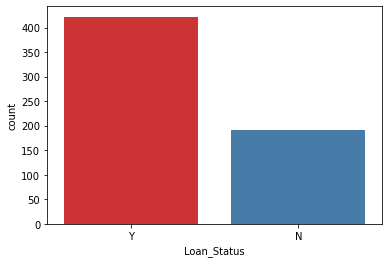

In [32]:
sns.countplot(LDF['Loan_Status'], palette="Set1")


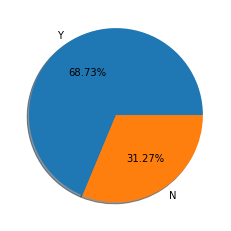

In [33]:
labels = 'Y','N'
fig, ax = plt.subplots()
ax.pie(LDF['Loan_Status'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class
'Y' : Has 68.73% of total values

'N' : Has 31.27% of total values

Classes are imbalanced.

# Analyzing Feature columns Catergorical Classes


In [34]:
LDF['Gender'].value_counts()


Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

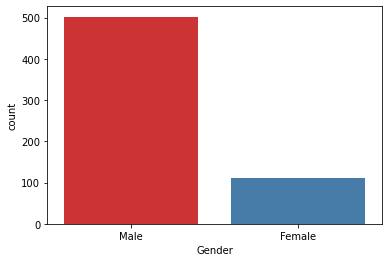

In [35]:
sns.countplot(LDF['Gender'], palette="Set1")


There are more Male Applicants than Female Applicants.



In [36]:
LDF['Married'].value_counts()


Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

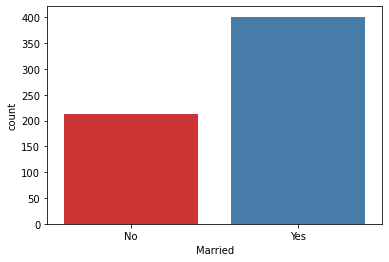

In [37]:
sns.countplot(LDF['Married'], palette="Set1")


There are more applicants who are married than those who are not.



In [38]:
LDF['Dependents'].value_counts()


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

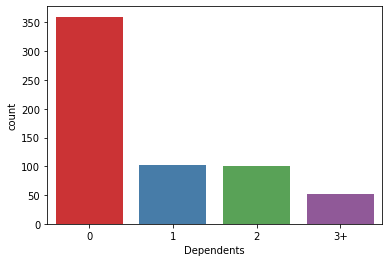

In [39]:
sns.countplot(LDF['Dependents'], palette="Set1")


Most applicants have no dependents to support.



In [40]:
LDF['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

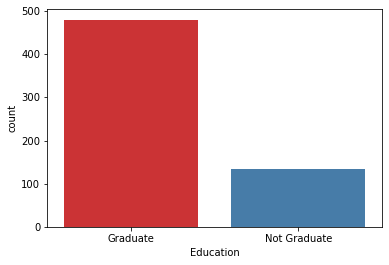

In [41]:
sns.countplot(LDF['Education'], palette="Set1")


Most applicants are Graduates.



In [42]:
LDF['Self_Employed'].value_counts() 


No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

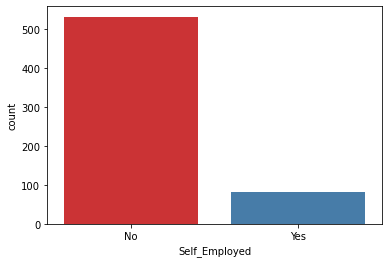

In [43]:
sns.countplot(LDF['Self_Employed'], palette="Set1")


Most applicants are not Self Employed.



<AxesSubplot:xlabel='Credit_History', ylabel='count'>

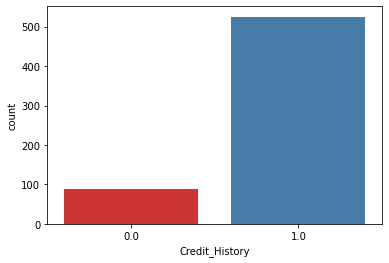

In [44]:
sns.countplot(LDF['Credit_History'], palette="Set1")


Most applicants have a credit history of '1.0'.



In [45]:
LDF['Property_Area'].value_counts() 


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

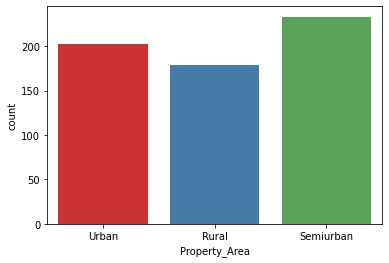

In [46]:
sns.countplot(LDF['Property_Area'], palette="Set1")


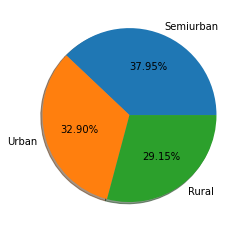

In [47]:
labels = 'Semiurban','Urban','Rural'
fig, ax = plt.subplots()
ax.pie(LDF['Property_Area'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

37.95% applicants are from Semiurban, while 32.90% of applicants are from Urban and 29.15% are from Rural areas.



# Analyzing Feature columns with Continuous Data.


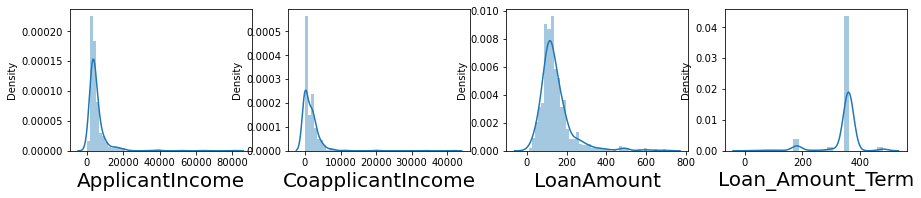

In [49]:
plt.figure(figsize=(15,12),facecolor='white')
plotnum=1
for col in LDF[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(LDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data distributions are skewed.



In [50]:
LDF[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.731705
Loan_Amount_Term    -2.373210
dtype: float64

# Interpreting Relationship between Dependent Variable and Independent Variables


# 'Loan_Status' vs Continuous/Discrete Data Columns


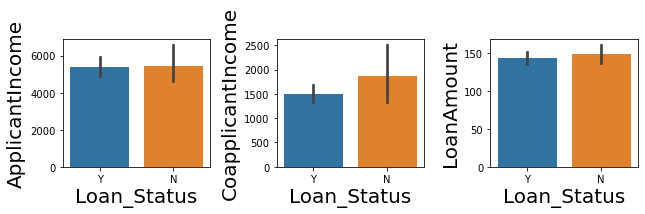

In [51]:
plt.figure(figsize=(15,12),facecolor='white')
plotnum=1
y = LDF['Loan_Status']
X = LDF[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

1. Applicant income doesnt seem to contribute significantly to loan approval.

2. Loan rejection is high for higher Coapplicant Income.

3. LoanAmount doesn't seem to have a strong correlation with Loan Status.

# 'Loan_Status' vs Categorical Data Columns


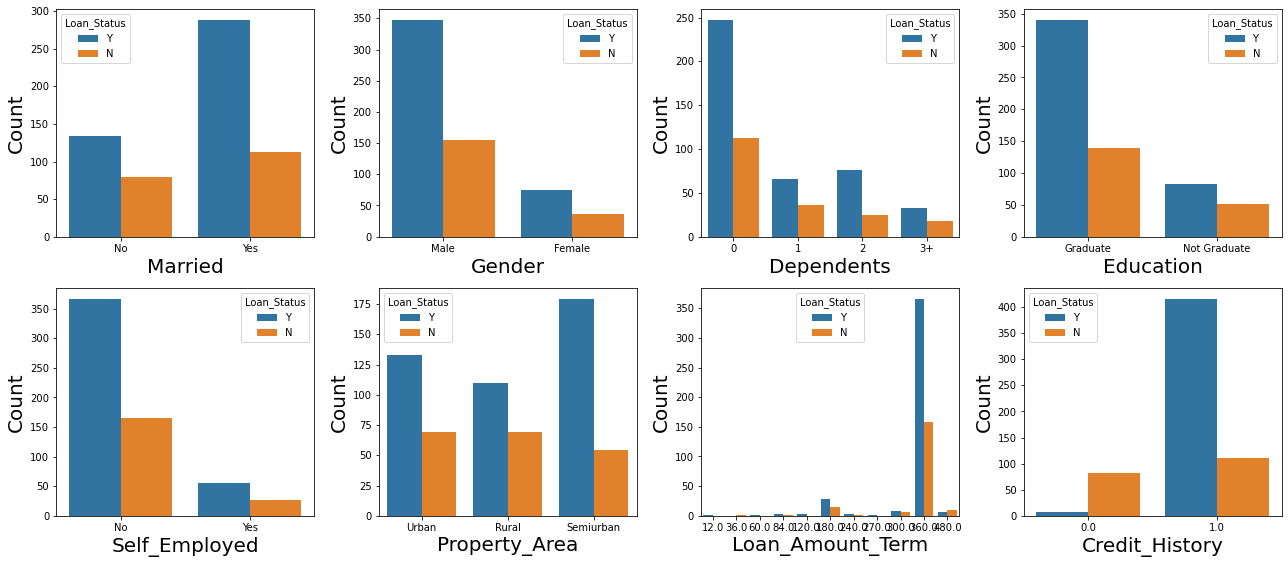

In [52]:
plt.figure(figsize=(18,19),facecolor='white')
plotnum=1
X = LDF[['Married','Gender','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term','Credit_History']]
y = LDF['Loan_Status']
for col in X:
    if plotnum<=23:
        plt.subplot(5,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

1. Married applicants have higher loan approval.

2. More Male applicants get loan approval than Female applicants. This may also be due to the fact that there are more male applicants than female applicants.

3. Applicants with 0 dependents have highest loan approval.

4. Graduates have higher loan approval.

5. Applicants who are not self employed have higher loan approval.

6. Applicants from semi urban areas have highest loan approval.

7. Highest loan approval is for 360.

8. Applicants with Credit History of 1.0 has highest loan approval.

In [53]:
LDF


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,97.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Dropping columns 'Loan_ID ', as it isnot required for predicting values of target column


In [54]:
LDF.drop(columns = ['Loan_ID'],inplace=True)


In [55]:
LDF.shape


(614, 12)

# Checking for Outliers


In [56]:
X = LDF.drop(columns = ['Loan_Status'])
y = LDF['Loan_Status']

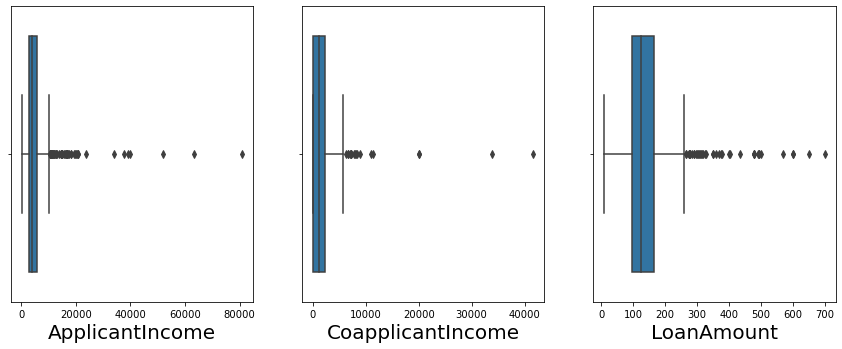

In [57]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns have a lot of outliers.



# Removing Outliers using Z score Method


In [58]:
df2 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()


In [59]:
df2


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,97.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


In [60]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [61]:
df3.shape


(589, 3)

In [62]:
df2.shape


(614, 3)

# Data loss %:


In [63]:
loss=(614-589)/614 * 100
loss

4.071661237785016

4.071% data loss is within acceptable range.



# Using IQR Method


In [64]:
df = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()


In [65]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [66]:
indxdrop


array([  9.,  34.,  54.,  67., 102., 106., 115., 119., 126., 128., 130.,
       138., 144., 146., 155., 171., 183., 185., 191., 199., 254., 258.,
       271., 278., 284., 308., 324., 333., 369., 370., 409., 424., 432.,
       438., 443., 467., 475., 478., 483., 487., 493., 506., 509., 525.,
       533., 534., 561., 572., 594., 604.,   9.,  12.,  38., 122., 135.,
       177., 180., 253., 349., 372., 402., 417., 444., 506., 513., 523.,
       581., 600.,   5.,   9.,  21.,  34.,  54.,  67.,  83., 126., 130.,
       135., 155., 161., 171., 177., 233., 253., 258., 260., 278., 308.,
       324., 325., 333., 351., 369., 372., 381., 391., 409., 432., 487.,
       506., 514., 523., 525., 536., 561., 572., 592., 600., 604.])

In [67]:
df = df.drop(indxdrop)


In [68]:
df.shape


(535, 3)

# Data loss %:


In [69]:
loss=(614-535)/614 * 100
loss

12.866449511400651

12.86% data loss is outside acceptable range.



# Using Z score method to reduce outliers


In [70]:
dropindx = X.index.difference(df3.index)


In [71]:
dropindx


Int64Index([  9, 126, 130, 155, 171, 177, 183, 185, 278, 308, 333, 369, 402,
            409, 417, 432, 443, 487, 506, 523, 525, 561, 581, 600, 604],
           dtype='int64')

In [72]:
LDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [73]:
LDF.reset_index(drop=True,inplace = True)


In [74]:
LDF.shape


(589, 12)

# Checking for Skewness in Data


In [75]:
X = LDF.drop(columns = ['Loan_Status'])
y = LDF['Loan_Status']

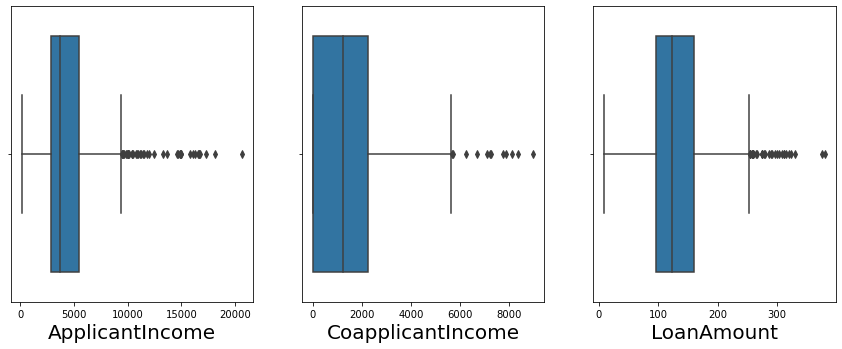

In [76]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed.



# Checking for Skewness in Data


In [77]:
X.skew()


ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.131835
Loan_Amount_Term    -2.415551
Credit_History      -2.010069
dtype: float64

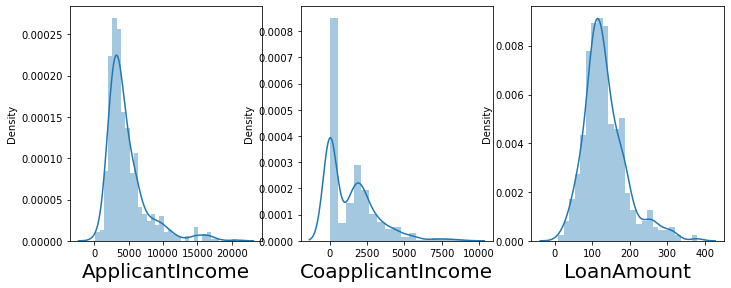

In [78]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Considerable skewness exists in the data distributions.



# Reducing skewness further using PowerTransformer


In [79]:
from sklearn.preprocessing import PowerTransformer


In [80]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)


In [81]:
df4 = X[['ApplicantIncome','CoapplicantIncome','LoanAmount']]


In [82]:
transformed= powtrans.fit_transform(df4)


In [83]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [84]:
transformed.skew()


ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.055016
dtype: float64

In [85]:
transformed.index = X.index


In [86]:
LDF[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = transformed[['ApplicantIncome','CoapplicantIncome','LoanAmount']]


In [87]:
LDF.skew()


ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.055016
Loan_Amount_Term    -2.415551
Credit_History      -2.010069
dtype: float64

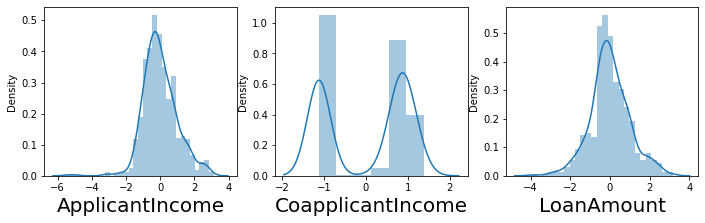

In [89]:
plt.figure(figsize=(20,18),facecolor='white')
plotnum=1
for col in LDF[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(LDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Distributions look much more Normalised now


# Encoding the categorical Feature Columns.


In [90]:
X[['Gender','Married','Education','Self_Employed','Property_Area']].nunique()


Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

# Encoding using get_dummies()


In [91]:
dumm = pd.get_dummies(X[['Gender','Married','Education','Self_Employed','Property_Area']],drop_first = False)


In [92]:
dumm


,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
584,1,0,1,0,1,0,1,0,1,0,0
585,0,1,0,1,1,0,1,0,1,0,0
586,0,1,0,1,1,0,1,0,0,0,1
587,0,1,0,1,1,0,1,0,0,0,1


In [93]:
LDF = LDF.join(dumm)


In [94]:
LDF.drop(columns = ['Gender','Married','Education','Self_Employed','Property_Area'],axis = 1, inplace = True)


# Encoding the 'Dependents' Column.


In [95]:
LDF['Dependents'].value_counts()


0     350
2      98
1      96
3+     45
Name: Dependents, dtype: int64

In [96]:
LDF['Dependents'] = LDF.Dependents.map({'0':0,'1':1,'2':2,'3+':3})


# Encoding the Label Column.


In [97]:
LDF['Loan_Status'] = LDF.Loan_Status.map({'N':0,'Y':1}) #'No' = 1 and 'Yes' = 0


In [98]:
LDF


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.688986,-1.119438,-0.591965,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,0.239843,0.748807,0.030899,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.525799,-1.119438,-1.358840,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.791841,0.899419,-0.119702,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.736280,-1.119438,0.263317,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,-0.586262,-1.119438,-1.221577,360.0,1.0,1,1,0,1,0,1,0,1,0,1,0,0
585,3,0.039489,-1.119438,-2.206882,180.0,1.0,1,0,1,0,1,1,0,1,0,1,0,0
586,1,1.291744,0.180599,1.854874,360.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1
587,2,1.173950,-1.119438,0.990141,360.0,1.0,1,0,1,0,1,1,0,1,0,0,0,1


# Finding Correlation


In [100]:
l_corr = LDF.corr()
l_corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Dependents,1.000000,0.105559,0.001199,0.130121,-0.086346,0.021937,-0.184580,0.184580,-0.333887,0.333887,-0.068588,0.068588,-0.055481,0.055481,-0.009055,0.007249,0.001300
ApplicantIncome,0.105559,1.000000,-0.359986,0.425358,-0.037099,-0.003320,-0.058502,0.058502,0.022535,-0.022535,0.168924,-0.168924,-0.215911,0.215911,0.022144,-0.015138,-0.005851
CoapplicantIncome,0.001199,-0.359986,1.000000,0.205011,0.007909,0.080277,-0.230767,0.230767,-0.334429,0.334429,-0.037050,0.037050,0.100679,-0.100679,0.066906,-0.014975,-0.049398
LoanAmount,0.130121,0.425358,0.205011,1.000000,0.088741,-0.030164,-0.156940,0.156940,-0.172338,0.172338,0.130505,-0.130505,-0.102696,0.102696,0.086766,0.006332,-0.090614
Loan_Amount_Term,-0.086346,-0.037099,0.007909,0.088741,1.000000,-0.023872,0.087734,-0.087734,0.105177,-0.105177,0.072941,-0.072941,0.051312,-0.051312,0.027724,0.064979,-0.093869
Loan_Status,0.021937,-0.003320,0.080277,-0.030164,-0.023872,1.000000,-0.021942,0.021942,-0.095124,0.095124,0.092852,-0.092852,0.016617,-0.016617,-0.101187,0.133422,-0.039514
Gender_Female,-0.184580,-0.058502,-0.230767,-0.156940,0.087734,-0.021942,1.000000,-1.000000,0.374745,-0.374745,0.050036,-0.050036,0.000841,-0.000841,-0.076936,0.107506,-0.036292
Gender_Male,0.184580,0.058502,0.230767,0.156940,-0.087734,0.021942,-1.000000,1.000000,-0.374745,0.374745,-0.050036,0.050036,-0.000841,0.000841,0.076936,-0.107506,0.036292
Married_No,-0.333887,0.022535,-0.334429,-0.172338,0.105177,-0.095124,0.374745,-0.374745,1.000000,-1.000000,0.015846,-0.015846,-0.004453,0.004453,0.011678,-0.004727,-0.006443
Married_Yes,0.333887,-0.022535,0.334429,0.172338,-0.105177,0.095124,-0.374745,0.374745,-1.000000,1.000000,-0.015846,0.015846,0.004453,-0.004453,-0.011678,0.004727,0.006443


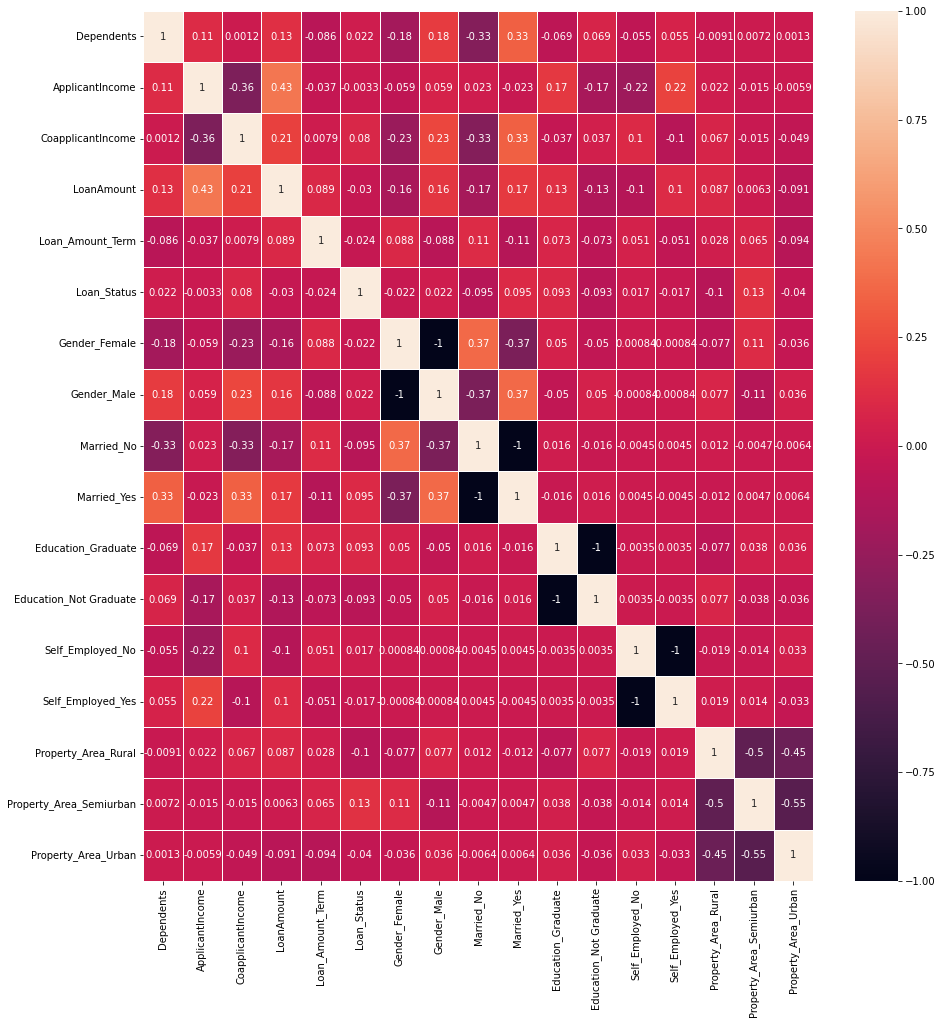

In [101]:
plt.figure(figsize=(15,16))
sns.heatmap(l_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.


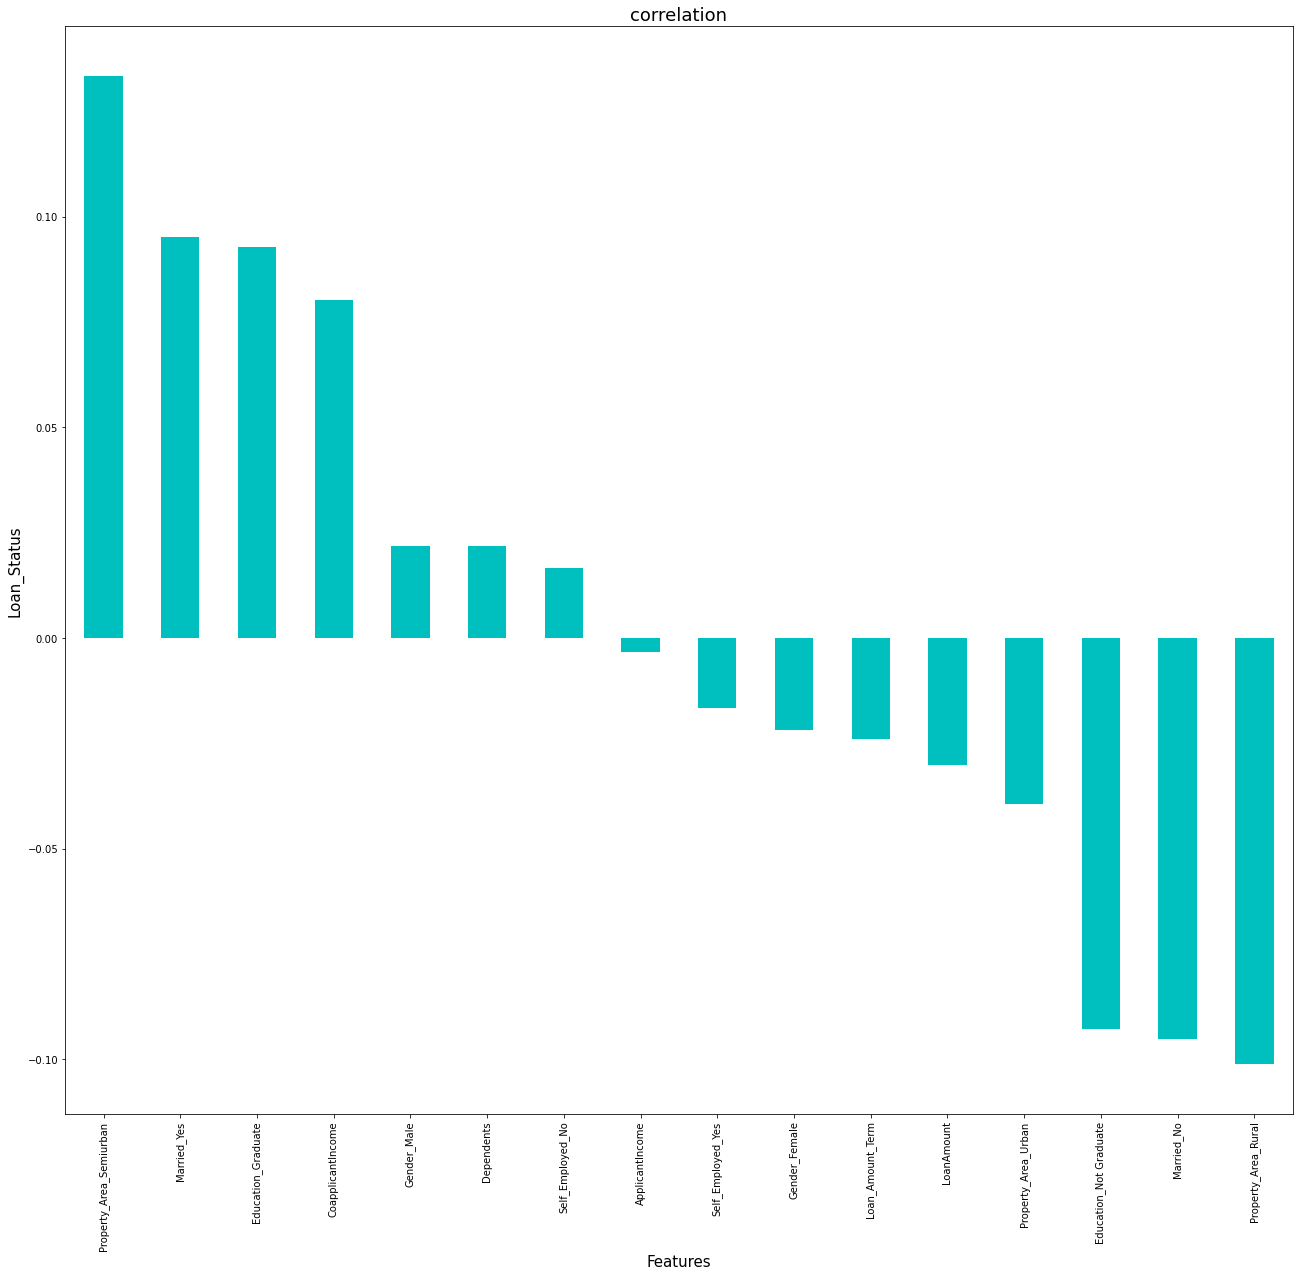

In [102]:
plt.figure(figsize = (22,20))
LDF.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Loan_Status',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Credit_History, Property_Area_Semiurban,Married_Yes,Education_Graduate have the highest positive correlation with Loan_Status, while Propert_Area_Rural,Married_No,Education_Not Graduate have the highest negative correlation with Loan_Status.

In [103]:
X = LDF.drop(columns = ['Loan_Status'])
y = LDF['Loan_Status']

# Feature Selection


In [104]:
from sklearn.preprocessing import StandardScaler


In [105]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [110]:
scaled_X


array([[-0.72840172,  0.68898634, -1.11943846, ..., -0.64487626,
        -0.77775615,  1.42691362],
       [ 0.27634913,  0.23984329,  0.74880747, ...,  1.5506851 ,
        -0.77775615, -0.70081327],
       [-0.72840172, -0.52579862, -1.11943846, ..., -0.64487626,
        -0.77775615,  1.42691362],
       ...,
       [ 0.27634913,  1.29174432,  0.18059936, ..., -0.64487626,
        -0.77775615,  1.42691362],
       [ 1.28109999,  1.17394957, -1.11943846, ..., -0.64487626,
        -0.77775615,  1.42691362],
       [-0.72840172,  0.23984329, -1.11943846, ..., -0.64487626,
         1.28575004, -0.70081327]])

# Checking for Multicollinearity using Variance Inflation Factor


In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [108]:
vif = pd.DataFrame()


In [109]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [111]:
vif


,Features,vif
0,Dependents,1.175565
1,ApplicantIncome,1.740729
2,CoapplicantIncome,1.596740
3,LoanAmount,1.551524
4,Loan_Amount_Term,1.054337
5,Credit_History,1.010453
6,Gender_Female,inf
7,Gender_Male,inf
8,Married_No,inf
9,Married_Yes,inf


There is no Multicollinearity.



# Principle Component Analysis


In [112]:
from sklearn.decomposition import PCA


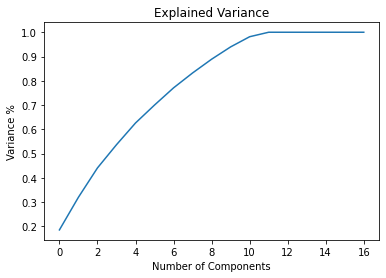

In [113]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

12 components explain around 95% variance in Data



In [114]:
pca = PCA(n_components=11)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(11))

In [115]:
principle_x


,0,1,2,3,4,5,6,7,8,9,10
0,1.477745,0.223738,-0.759993,-2.212422,-0.495823,-1.390780,-0.850679,-0.005600,-0.357638,-0.409299,-0.197627
1,-1.404056,0.056256,-0.812935,-0.306848,1.611472,0.808406,0.330747,0.626621,-0.082158,-0.370392,-0.068810
2,-0.374149,2.364154,1.474628,-1.146642,-2.109434,1.508575,-1.680112,0.428132,-0.109075,-1.461699,-1.236820
3,-1.366922,-2.338468,1.131871,-0.691030,-1.084978,0.263544,-0.263363,-0.936653,-1.451560,0.176614,-0.689424
4,1.330849,0.475633,-0.811422,-2.175871,-0.270152,-1.538004,-0.593408,-0.360275,-0.607552,-0.063718,-0.074591
...,...,...,...,...,...,...,...,...,...,...,...
584,3.766303,-0.503753,-0.310603,-0.381374,1.275123,1.376283,0.718595,1.280108,0.166361,-0.600320,-0.137445
585,-1.268406,-0.238474,-0.051793,-0.812562,-0.064949,0.161665,1.016321,3.900296,1.955542,-0.712266,0.790957
586,-1.478884,1.041106,-1.283638,-1.149662,-0.471881,-0.669126,1.137838,-1.024885,-1.214296,0.413300,-0.120778
587,-1.234927,1.024691,-1.028008,-1.272043,-0.962089,-1.132524,1.539254,-0.170138,-0.568012,-0.791364,0.086355


# Selecting Kbest Features


In [118]:
from sklearn.feature_selection import SelectKBest, f_classif


In [119]:
bestfeat = SelectKBest(score_func = f_classif, k = 17)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [120]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(17,'Score'))

                    Feature       Score
5            Credit_History  262.535101
15  Property_Area_Semiurban   10.638798
14      Property_Area_Rural    6.072342
9               Married_Yes    5.359961
8                Married_No    5.359961
11   Education_Not Graduate    5.104883
10       Education_Graduate    5.104883
2         CoapplicantIncome    3.807431
16      Property_Area_Urban    0.917930
3                LoanAmount    0.534582
4          Loan_Amount_Term    0.334713
7               Gender_Male    0.282758
6             Gender_Female    0.282758
0                Dependents    0.282620
12         Self_Employed_No    0.162130
13        Self_Employed_Yes    0.162130
1           ApplicantIncome    0.006468


In [121]:
x_best = X.drop(columns=['ApplicantIncome','Self_Employed_Yes','Self_Employed_No','Dependents']).copy()


In [122]:
x_best


,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.119438,-0.591965,360.0,1.0,0,1,1,0,1,0,0,0,1
1,0.748807,0.030899,360.0,1.0,0,1,0,1,1,0,1,0,0
2,-1.119438,-1.358840,360.0,1.0,0,1,0,1,1,0,0,0,1
3,0.899419,-0.119702,360.0,1.0,0,1,0,1,0,1,0,0,1
4,-1.119438,0.263317,360.0,1.0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,-1.119438,-1.221577,360.0,1.0,1,0,1,0,1,0,1,0,0
585,-1.119438,-2.206882,180.0,1.0,0,1,0,1,1,0,1,0,0
586,0.180599,1.854874,360.0,1.0,0,1,0,1,1,0,0,0,1
587,-1.119438,0.990141,360.0,1.0,0,1,0,1,1,0,0,0,1


In [123]:
scaled_x_best = scaler.fit_transform(x_best)


# This is a Classification problem since Target/ Lable column ('Loan_Status') has Categorical type of Data.


# Classification Model Building


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Finding the best random state


In [125]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8579234972677595 on random_state: 56


In [126]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, stratify = y,random_state = 56) #since class imbalance exists


In [127]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [128]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [129]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

# Training the Models


In [130]:
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

All Models have been trained.



# Logistic Regression Model Accuracy


In [131]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [132]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[ 32,  25],
       [  1, 125]], dtype=int64)

In [133]:
print(accu)


              precision    recall  f1-score   support

           0       0.97      0.56      0.71        57
           1       0.83      0.99      0.91       126

    accuracy                           0.86       183
   macro avg       0.90      0.78      0.81       183
weighted avg       0.88      0.86      0.85       183



# Random Forest Classifier Model Accuracy


In [134]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [135]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[ 36,  21],
       [ 14, 112]], dtype=int64)

In [136]:
print(accu)


              precision    recall  f1-score   support

           0       0.72      0.63      0.67        57
           1       0.84      0.89      0.86       126

    accuracy                           0.81       183
   macro avg       0.78      0.76      0.77       183
weighted avg       0.80      0.81      0.81       183



# XGB Classifier Model Accuracy


In [137]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [138]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[ 38,  19],
       [ 17, 109]], dtype=int64)

In [139]:
print(accu)


              precision    recall  f1-score   support

           0       0.69      0.67      0.68        57
           1       0.85      0.87      0.86       126

    accuracy                           0.80       183
   macro avg       0.77      0.77      0.77       183
weighted avg       0.80      0.80      0.80       183



# AdaBoost Classifier Model Accuracy


In [140]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [141]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[ 36,  21],
       [  9, 117]], dtype=int64)

In [142]:
print(accu)


              precision    recall  f1-score   support

           0       0.80      0.63      0.71        57
           1       0.85      0.93      0.89       126

    accuracy                           0.84       183
   macro avg       0.82      0.78      0.80       183
weighted avg       0.83      0.84      0.83       183



# SV Classifier Model Accuracy


In [143]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[ 32,  25],
       [  1, 125]], dtype=int64)

In [144]:
print(accu)


              precision    recall  f1-score   support

           0       0.97      0.56      0.71        57
           1       0.83      0.99      0.91       126

    accuracy                           0.86       183
   macro avg       0.90      0.78      0.81       183
weighted avg       0.88      0.86      0.85       183



# K Nearest Neighbours Classifier Model Accuracy


In [145]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [146]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[ 30,  27],
       [ 12, 114]], dtype=int64)

In [147]:
print(accu)

              precision    recall  f1-score   support

           0       0.71      0.53      0.61        57
           1       0.81      0.90      0.85       126

    accuracy                           0.79       183
   macro avg       0.76      0.72      0.73       183
weighted avg       0.78      0.79      0.78       183



# Model Cross Validation


In [148]:
from sklearn.model_selection import cross_val_score as cvs


# Logistic Regression


In [149]:
print(cvs(LOGR,scaled_x_best,y,cv=5).mean()) 


0.8149645081848472


# Random Forest Classifier


In [150]:
print(cvs(RFC,scaled_x_best,y,cv=5).mean())


0.7674199623352165


# XGB Classifier


In [151]:
print(cvs(XGBC,scaled_x_best,y,cv=5).mean())


0.7623062436621758


# Adaboost Classifier


In [152]:
print(cvs(adbc,scaled_x_best,y,cv=5).mean())


0.7894393741851369


# SV Classifier


In [153]:
print(cvs(SV,scaled_x_best,y,cv=5).mean())


0.8166594234390845


# K Nearest Neighbours Classifier


In [154]:
print(cvs(KNN,scaled_x_best,y,cv=5).mean())


0.7725336810082573


# Based on comparing Accuracy Score results, with Cross Validation results, it is determined that Logistic Regression is the best model.


# ROC AUC Scores


# Logistic Regression


In [155]:
roc_auc_score(y_test,LOGRpred)


0.7767335004177109

# SV Classifier


In [156]:
roc_auc_score(y_test,SVpred)


0.7767335004177109

Adaboost Classifier


In [157]:
roc_auc_score(y_test,adbcpred)


0.7800751879699248

XGB Classifier


In [158]:
roc_auc_score(y_test,XGBCpred)


0.7658730158730159

Random Forest Classifier


In [160]:
roc_auc_score(y_test,RFCpred)


0.7602339181286549

K Nearest Neighbours Classifier


In [161]:
roc_auc_score(y_test,KNNpred)


0.7155388471177946

# ROC AUC curves


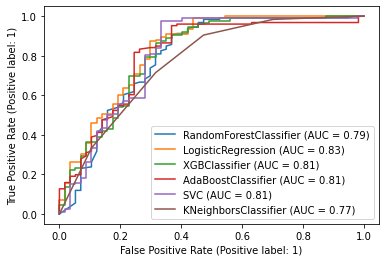

In [162]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,adbc,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on the above graph and roc_auc_scores, Logistic Regression is the best model for the dataset, with AUC = 0.83 and roc_auc_score = 0.7767

# Hyper Parameter Tuning


In [163]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression


In [164]:
parameter = {'C':[0.001,0.01,0.1,0,1,1.1],'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,3,5,10,20,45],'solver':['liblinear'],'max_iter':[100,200,300,400,500],'multi_class':['auto', 'ovr', 'multinomial']}


In [165]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose=2)


In [166]:
GridCV.fit(x_train,y_train)


Fitting 5 folds for each of 10080 candidates, totalling 50400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1, 1.1],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300, 400, 500],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 5, 10, 20, 45],
                         'solver': ['liblinear']},
             verbose=2)

In [167]:
GridCV.best_params_


{'C': 0.01,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [168]:
Best_mod1 = LogisticRegression(C = 0.01,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

85.79234972677595


Logistic Regression has an accuracy score of 85.79%


In [169]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[ 32,  25],
       [  1, 125]], dtype=int64)

# Saving The Model


In [170]:
import joblib
joblib.dump(Best_mod1,"BestModelLoan.pkl")

['BestModelLoan.pkl']

# Loading The Model


In [171]:
mod=joblib.load("BestModelLoan.pkl")


In [172]:
print(mod.predict(x_test))


[1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1]


In [173]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
41,1,1
142,1,1
85,1,1
561,0,0
413,1,1
520,0,0
230,1,1
8,1,1
78,1,1
498,0,0
